In [13]:
import pandas as pd

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from logparser import LogReader, PosReader, RinexReader

# Open-sky

In [14]:
# Load files
folder_path = "/mnt/c/Users/vmangr/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/S1"
acq_list = [f"A{i:02d}" for i in range(1, 11)]
log_dict = {}

In [15]:
# Android devices
device_list_android = ['A52', 'GP7', 'GPW', 'SW6']
for acq in acq_list:
    for device in device_list_android:
        filepath = f"{folder_path}/{acq}/{device}/Raw.csv"
        if not os.path.isfile(filepath):
            #print(f"File not found for {acq} {device}")
            continue
        log = LogReader(manufacturer="", device="", acronym=device, specifiedTags='Raw', mode="old", filepath=filepath)
        if device in log_dict:
            log_dict[device] = pd.concat([log_dict[device], log.raw], ignore_index=True, sort=False)
        else:
            log_dict[device] = log.raw


In [16]:

# ULISS devices
device_list_uliss = ['U1', 'UA']
measurements_RINEX = sum([[f"{y}{x}" for y in ['S']] for x in ['1C', '2L', '2S', '2C', '2I', '7Q', '7I']], []) # '2L', '2S', '2C', '2I', '7Q', '7I'
for acq in acq_list:
    for device in device_list_uliss:
        filepath = f"{folder_path}/{acq}/{device}/gnss.rnx"
        if not os.path.isfile(filepath):
            #print(f"File not found for {acq} {device}")
            continue
        log = RinexReader(device, filepath, tlim=[], meas=measurements_RINEX, sampling=0.2)
        if device in log_dict:
            log_dict[device] = pd.concat([log_dict[device], log.df], ignore_index=True, sort=False)
        else:
            log_dict[device] = log.df

log_dict['UA']

KeyboardInterrupt: 

/tmp/ipykernel_22217/2414579801.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.rename(columns={'snr':'Cn0DbHz'}, inplace=True)
/tmp/ipykernel_22217/2414579801.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['device'] = device


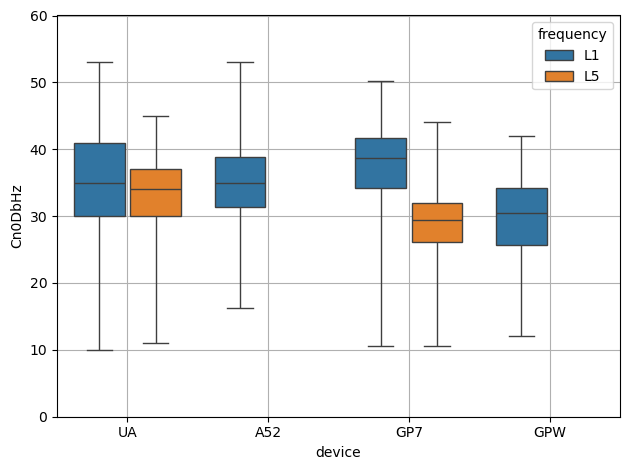

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# suppose df1 and df2 are dataframes, each with the same 10 columns
df = pd.DataFrame()
for device, log in log_dict.items():
    if device in device_list_android:
        _df = log.reset_index()[['Cn0DbHz', 'frequency']]
    if device in device_list_uliss:
        _df = log[['snr', 'frequency']]
        _df.rename(columns={'snr':'Cn0DbHz'}, inplace=True)
    _df['device'] = device

    # .rename(columns={'Cn0DbHz':device})
    df = pd.concat([df, _df], axis=0)
    # #df[device] = log['Cn0DbHz'].melt()
df

sns.boxplot(data=df, x='device', y='Cn0DbHz', hue='frequency', whis=(0, 100), gap=.1)
plt.ylim((0, 60))
plt.rc('axes', axisbelow=True)
plt.grid()
plt.tight_layout()


,source,variable,value
0,df1,a,-1.165870
1,df1,a,-1.674587
2,df1,a,-2.500262
3,df1,a,-3.571375
4,df1,a,-2.738805
...,...,...,...
1595,df3,d,1.206606
1596,df3,d,1.625141
1597,df3,d,3.004727
1598,df3,d,1.222204


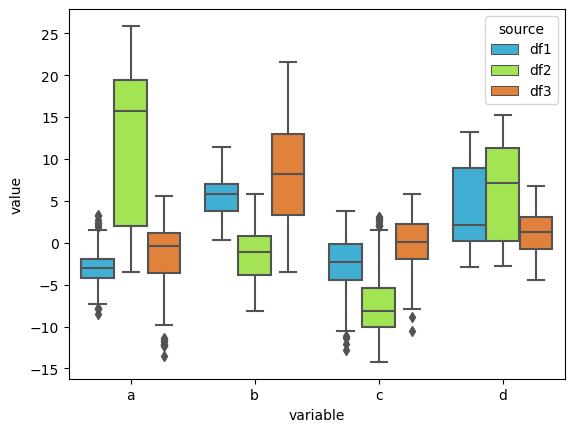

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# suppose df1 and df2 are dataframes, each with the same 10 columns
df1 = pd.DataFrame({i: np.random.randn(100).cumsum() for i in 'abcd'})
df2 = pd.DataFrame({i: np.random.randn(150).cumsum() for i in 'abcd'})
df3 = pd.DataFrame({i: np.random.randn(150).cumsum() for i in 'abcd'})

# pd.melt converts the dataframe to long form, pd.concat combines them
df = pd.concat({'df1': df1.melt(), 'df2': df2.melt(), 'df3': df3.melt()}, names=['source', 'old_index'])
# convert the source index to a column, and reset the old index
df = df.reset_index(level=0).reset_index(drop=True)

sns.boxplot(data=df, x='variable', y='value', hue='source', palette='turbo')
df